In [30]:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib.pyplot as plt
from pypde.bases import *

N = 10

# Bases
CH = SpectralBase(N,"CH")
CD = SpectralBase(N,"CD")
DC = DirichletC(N)

# Space
x = CH.x
f = (x-1)*0.5

# Boundary conditions
bc = np.zeros(2)
bc[0] = -1

# Transform
fhatch = CH.forward_fft(f)
fhatcd = CD.forward_fft(f,bc=bc)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


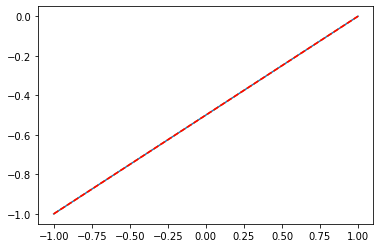

In [31]:
plt.plot(x,f)
plt.plot(x,CH.backward_fft(fhatch),"--")
plt.plot(x,CD.backward_fft(fhatcd,bc=bc),"r--")
plt.show()

## 2-Dimensional

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


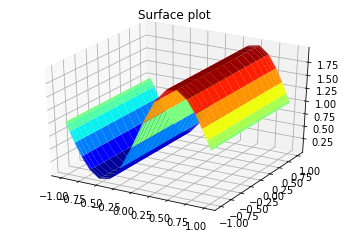

In [53]:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib.pyplot as plt
from pypde.bases import *
from mpl_toolkits.mplot3d import Axes3D

N = 20

# Bases
CH = SpectralBase(N,"CH")
CD = SpectralBase(N,"CD")
CN = SpectralBase(N,"CN")
DC = DirichletC(N)

# Space
x = CH.x
y = CD.x
xx,yy = np.meshgrid(x,y,indexing="ij")
f = np.sin(np.pi*xx )+1#+0.5*xx-0.5

# Boundary conditions
bc = np.zeros((2,N))
bc[0,:] = x
bchat = CD.forward_fft(bc.T).T

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(xx, yy, f,cmap='jet', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

fhatcd = CD.forward_fft(f)
fhat = CH.forward_fft(f)
fcd = CD.backward_fft(fhatcd)

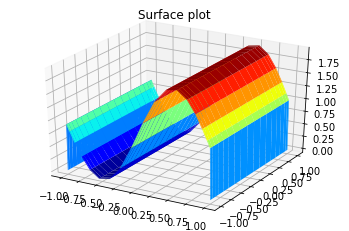

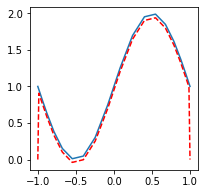

In [52]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(xx, yy, fcd,cmap='jet', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

fig,ax = plt.subplots(figsize=(3,3))
ax.plot(x,f[:,1])
ax.plot(x,fcd[:,1],"r--")
plt.show()

In [78]:
N = 6

# Bases
CH = SpectralBase(N,"CH")
CD = SpectralBase(N,"CD")
CN = SpectralBase(N,"CN")
x = CD.x

f = np.sin(np.pi*x )+1
fhat = CN.forward_fft(f)
ff = CN.to_chebyshev(fhat)

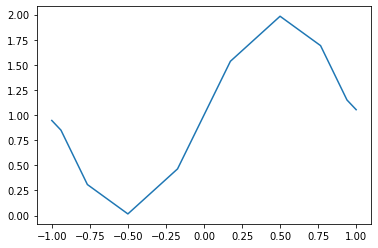

In [74]:
plt.plot(x, CN.backward_fft(fhat))
plt.show()

In [80]:
fhat  = CH.forward_fft(f)
fhat

array([ 1.00000000e+00,  5.69474843e-01,  0.00000000e+00, -6.73757211e-01,
        8.88178420e-17,  1.04282368e-01])

In [96]:
S = CD.S
fcd1 = np.linalg.lstsq(S,fhat)[0]
print(fcd1)
fcd2 = CD.from_chebyshev(fhat)
print(fcd2)

[ 0.66666667  0.56947484  0.33333333 -0.10428237]
[ 0.66666667  0.56947484  0.33333333 -0.10428237]


/home/philipp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [97]:
S@fcd2

array([ 0.66666667,  0.56947484, -0.33333333, -0.67375721, -0.33333333,
        0.10428237])

In [98]:
fhat

array([ 0.66666667,  0.56947484, -0.33333333, -0.67375721, -0.33333333,
        0.10428237])